<a href="https://colab.research.google.com/github/thecoco-cloud/Insurance_premium_prediction/blob/master/projet_velo_sujet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet

Le projet consiste à prévoir le nombre de vélos loués à chaque heure dans des bornes libres-services de la ville (système type Vélib'). La variable cible est ici la variable **count**.

Voici un descriptif de l'ensemble des variables :
* *datetime* - date et heure du relevé 
* *season* - 1 = printemps , 2 = été, 3 = automne, 4 = hiver 
* *holiday* – indique si le jour est un jour de vacances scolaires 
* *workingday* - indique si le jour est travaillé (ni week-end ni vacances) 
* *weather* - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges 
* *temp* – température en degrés Celsius 
* *atemp* – température ressentie en degrés Celsius 
* *humidity* – taux d’humidité 
* *windspeed* – vitesse du vent 
* *casual* - nombre de locations d’usagers non abonnés 
* *registered* – nombre de locations d’usagers abonnés 
* *count* – nombre total de locations de vélos 

L'objectif du projet est de mener à bien la création d'un modèle qui pourrait théoriquement être déployé en production. Les étapes d'exploration des données, de traitement et de preprocessing ne sont bien entendu pas à négliger. Il ne s'agit pas d'une compétition de type *Kaggle*, le projet ne sera pas uniquement noté sur la performance du modèle, mais plutôt sur votre approche complète et la justification de chacun de vos choix.

Comme vu durant le cours, soyez faites attention à certains points :
- quel type de problème dois-je traiter ?
- feature engineering : est-ce que j'utilise les données correctement, toutes les données ?
- data leakage : est-ce qu'une de mes features n'est pas trop explicative ?
- ai-je bien traité toutes les données correctement ?
- est-ce que mon modèle est adapté ?
- etc, etc, etc

Soyez vigilant à expliquer et justifier votre démarche à l'aide de visualisation, de commentaires dans vos codes (pensez aux cellules markdown), etc

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb


%matplotlib inline

In [ ]:
#df = pd.read_csv("../data/input/velo.csv")

from numpy.random import RandomState

import numpy as np

from google.colab import files
uploaded = files.upload()

import io

df = pd.read_csv(io.BytesIO(uploaded['velo.csv']))

print("Dimension des données (nombre d'échantillons, nombre de variables)")
print(df.shape)

rng = RandomState()

train_df = df.sample(frac=0.7, random_state=rng)
test_df = df.loc[~df.index.isin(train_df.index)]




Saving velo.csv to velo.csv
Dimension des données (nombre d'échantillons, nombre de variables)
(10886, 12)


In [ ]:
train_df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
3436,2011-08-13 02:00:00,3,0,0,1,27.88,31.820,57,0.0000,16,58,74
10009,2012-11-02 10:00:00,4,0,1,1,15.58,19.695,46,19.9995,21,183,204
7584,2012-05-15 09:00:00,2,0,1,2,23.78,27.275,88,6.0032,28,327,355
6254,2012-02-16 20:00:00,1,0,1,2,13.12,16.665,87,8.9981,5,211,216
9098,2012-09-02 11:00:00,3,0,0,2,30.34,34.850,70,0.0000,226,263,489
9724,2012-10-09 13:00:00,4,0,1,2,20.50,24.240,67,8.9981,54,184,238
6389,2012-03-03 11:00:00,1,0,0,2,16.40,20.455,87,6.0032,33,181,214
1014,2011-03-06 18:00:00,1,0,0,3,13.12,14.395,100,23.9994,0,23,23
456,2011-02-02 02:00:00,1,0,1,3,9.02,11.365,93,8.9981,4,0,4
6863,2012-04-04 07:00:00,2,0,1,2,18.04,21.970,62,0.0000,12,354,366


In [ ]:
train_df.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5732,2012-01-14 00:00:00,1,0,0,1,6.56,9.090,47,7.0015,2,42,44
10571,2012-12-06 21:00:00,4,0,1,2,9.84,12.120,60,8.9981,7,184,191
7699,2012-06-01 04:00:00,2,0,1,2,25.42,29.545,73,6.0032,1,5,6
3946,2011-09-15 11:00:00,3,0,1,2,27.88,31.820,65,8.9981,39,120,159
9670,2012-10-07 07:00:00,4,0,0,3,17.22,21.210,58,11.0014,6,29,35
2871,2011-07-08 13:00:00,3,0,1,2,31.98,37.880,66,19.0012,54,175,229
5141,2011-12-08 07:00:00,4,0,1,1,9.02,10.605,60,15.0013,11,233,244
9231,2012-09-08 00:00:00,3,0,0,1,27.06,29.545,89,16.9979,20,130,150
6378,2012-03-03 00:00:00,1,0,0,3,14.76,18.180,93,6.0032,1,21,22
7849,2012-06-07 10:00:00,2,0,1,1,24.60,30.305,64,6.0032,56,154,210


In [ ]:
train_df.shape

(7620, 12)

In [ ]:
test_df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14
18,2011-01-01 18:00:00,1,0,0,3,17.22,21.210,88,16.9979,9,26,35
20,2011-01-01 20:00:00,1,0,0,2,16.40,20.455,87,16.9979,11,25,36
22,2011-01-01 22:00:00,1,0,0,2,16.40,20.455,94,15.0013,11,17,28
24,2011-01-02 00:00:00,1,0,0,2,18.86,22.725,88,19.9995,4,13,17


In [ ]:
test_df.shape

(3266, 12)

For consistency, add 'Empty' columns for casual, registered and count. The entries in this column will be NaN, which stand for "not a number"

In [ ]:
test

In [ ]:
train_df.describe(include='all')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,7620,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000
unique,7620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-05-18 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506037,0.028740,0.679265,1.421260,20.167265,23.595114,61.994094,12.813435,35.700656,153.529396,189.230052
std,NaN,1.115976,0.167086,0.466790,0.634337,7.788145,8.476300,19.115240,8.206704,49.761313,149.429614,179.508249
min,NaN,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,34.750000,41.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,16.000000,118.000000,144.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,48.000000,219.000000,280.000000


In [ ]:
test_df.describe(include='all')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,3266,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000
unique,3266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-03-03 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.507961,0.028169,0.684630,1.411819,20.379235,23.795003,61.635334,12.766639,36.771586,160.271586,197.043172
std,NaN,1.116806,0.165481,0.464734,0.632723,7.798797,8.470281,19.545155,8.066454,50.421791,154.649281,184.817868
min,NaN,1.000000,0.000000,0.000000,1.000000,0.820000,1.515000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,38.000000,46.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,120.000000,147.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.855000,31.060000,77.000000,16.997900,51.000000,230.000000,292.000000


Are the 'datetime' columns in proper datetime format?

In [ ]:
train_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
test_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Convert the datetime columns to proper datetime format, and rerun the cells above to see if the conversion took

In [ ]:

train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7620 entries, 3436 to 7849
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    7620 non-null   datetime64[ns]
 1   season      7620 non-null   int64         
 2   holiday     7620 non-null   int64         
 3   workingday  7620 non-null   int64         
 4   weather     7620 non-null   int64         
 5   temp        7620 non-null   float64       
 6   atemp       7620 non-null   float64       
 7   humidity    7620 non-null   int64         
 8   windspeed   7620 non-null   float64       
 9   casual      7620 non-null   int64         
 10  registered  7620 non-null   int64         
 11  count       7620 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 773.9 KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3266 entries, 3 to 10880
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    3266 non-null   datetime64[ns]
 1   season      3266 non-null   int64         
 2   holiday     3266 non-null   int64         
 3   workingday  3266 non-null   int64         
 4   weather     3266 non-null   int64         
 5   temp        3266 non-null   float64       
 6   atemp       3266 non-null   float64       
 7   humidity    3266 non-null   int64         
 8   windspeed   3266 non-null   float64       
 9   casual      3266 non-null   int64         
 10  registered  3266 non-null   int64         
 11  count       3266 non-null   int64         
 12  year        3266 non-null   int64         
 13  month       3266 non-null   int64         
 14  hour        3266 non-null   int64         
 15  DOW         3266 non-null   int64         
dtypes: datetime64[ns](1), f

Check out summaries of the data, using the describe() method . Are there any missing values in the data ? The method info() tells us about whether there are any missing values (or NaNs) in our data, by reporting the count of the non missing (or non-null) entries

In [ ]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000
mean,2.506037,0.028740,0.679265,1.421260,20.167265,23.595114,61.994094,12.813435,35.700656,153.529396,189.230052
std,1.115976,0.167086,0.466790,0.634337,7.788145,8.476300,19.115240,8.206704,49.761313,149.429614,179.508249
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,34.750000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,16.000000,118.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,48.000000,219.000000,280.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,44.695000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
test_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000
mean,2.507961,0.028169,0.684630,1.411819,20.379235,23.795003,61.635334,12.766639,36.771586,160.271586,197.043172
std,1.116806,0.165481,0.464734,0.632723,7.798797,8.470281,19.545155,8.066454,50.421791,154.649281,184.817868
min,1.000000,0.000000,0.000000,1.000000,0.820000,1.515000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,38.000000,46.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,120.000000,147.000000
75%,4.000000,0.000000,1.000000,2.000000,26.855000,31.060000,77.000000,16.997900,51.000000,230.000000,292.000000
max,4.000000,1.000000,1.000000,3.000000,39.360000,45.455000,100.000000,47.998800,362.000000,857.000000,970.000000


**FEATURE ENGINEERING**

From the datime column, we extract year, month, hour and day of week, and then add these features to the data frame as new variable

In [ ]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['hour'] = train_df['datetime'].dt.hour
train_df['DOW'] = train_df['datetime'].dt.dayofweek

test_df['year'] = test_df['datetime'].dt.year
test_df['month'] = test_df['datetime'].dt.month
test_df['hour'] = test_df['datetime'].dt.hour
test_df['DOW'] = test_df['datetime'].dt.dayofweek

Another way to refer to the datetime column is to use the iloc method "." refers to all the rows and "0" refers to the first column. Python numbers the first item in a list as 0, the second items as 1

In [ ]:
train_df.iloc[:,0]

3436    2011-08-13 02:00:00
10009   2012-11-02 10:00:00
7584    2012-05-15 09:00:00
6254    2012-02-16 20:00:00
9098    2012-09-02 11:00:00
                ...        
2871    2011-07-08 13:00:00
5141    2011-12-08 07:00:00
9231    2012-09-08 00:00:00
6378    2012-03-03 00:00:00
7849    2012-06-07 10:00:00
Name: datetime, Length: 7620, dtype: datetime64[ns]

In [ ]:
train_df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,DOW
3436,2011-08-13 02:00:00,3,0,0,1,27.88,31.820,57,0.0000,16,58,74,2011,8,2,5
10009,2012-11-02 10:00:00,4,0,1,1,15.58,19.695,46,19.9995,21,183,204,2012,11,10,4
7584,2012-05-15 09:00:00,2,0,1,2,23.78,27.275,88,6.0032,28,327,355,2012,5,9,1
6254,2012-02-16 20:00:00,1,0,1,2,13.12,16.665,87,8.9981,5,211,216,2012,2,20,3
9098,2012-09-02 11:00:00,3,0,0,2,30.34,34.850,70,0.0000,226,263,489,2012,9,11,6
9724,2012-10-09 13:00:00,4,0,1,2,20.50,24.240,67,8.9981,54,184,238,2012,10,13,1
6389,2012-03-03 11:00:00,1,0,0,2,16.40,20.455,87,6.0032,33,181,214,2012,3,11,5
1014,2011-03-06 18:00:00,1,0,0,3,13.12,14.395,100,23.9994,0,23,23,2011,3,18,6
456,2011-02-02 02:00:00,1,0,1,3,9.02,11.365,93,8.9981,4,0,4,2011,2,2,2
6863,2012-04-04 07:00:00,2,0,1,2,18.04,21.970,62,0.0000,12,354,366,2012,4,7,2


In [ ]:
  train_df.iloc[3,11]

216

what is the rental count on the fourth day? this entry is in the 4th row and 12th column in the data frame

In [ ]:
ind_variables_selected=['workingday', 'temp', 'year', 'month', 'hour', 'DOW']

In [ ]:
X_orig_train =  train_df[ind_variables_selected]
y_orig_train = train_df['count']

In [ ]:
X_test= test_df[ind_variables_selected]
y_test = test_df['count']

NOTE: in the python world, because the independent variable are in a 'matrix', they use a capital X to denote the data frame with these columns. The dependent variable is a 'vector' , so they use a lower case y to denote this single column 

**Create smaller training and validation sets**

split the original training set into a 75% smaller training and a 25% validation set

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_orig_train,y_orig_train, test_size=0.25, random_state=201 )

In [ ]:
X_train.head()

,workingday,temp,year,month,hour,DOW
3610,1,25.42,2011,9,8,3
10794,0,13.94,2012,12,4,6
6257,1,13.12,2012,2,23,3
8797,1,29.52,2012,8,22,2
7480,1,18.86,2012,5,1,4


In [ ]:
X_valid.head()

,workingday,temp,year,month,hour,DOW
5121,1,18.04,2011,12,11,2
9306,1,19.68,2012,9,3,1
3900,1,30.34,2011,9,13,1
8290,1,36.08,2012,7,19,4
2681,0,30.34,2011,6,15,6


**Set up the scoring rule**

Root mean squared logarithmic error (RMSLE) is used for scoring (or evaluation).
 

In [ ]:
def RMSLE(predictions, realizations):
    predictions_use =  predictions.clip(0)
    rmsle = np.sqrt(np.mean(np.array(np.log(predictions_use + 1)-np.log(realizations + 1))**2))
    return rmsle

**Fit a regression tree**



A regression tree is tuned with min_samples_split. Its default setting is 0, which means 20 samples are required in any node for that node to be split on. Once a node has fewer than 20 samples in it, no more splits will occur. The smaller you set min_samoles_split, the deeper the fitted tree you get.

In [ ]:
rt= DecisionTreeRegressor(min_samples_split=25, random_state=201)
rt_model = rt.fit(X_train, y_train)
rt_pred=rt_model.predict(X_valid)

Look at the importances of the variables (or features). Which feature is the most important? The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the MSE brought by that feature

In [ ]:
pd.DataFrame(rt_model.feature_importances_, index=ind_variables_selected)

,0
workingday,0.033331
temp,0.118348
year,0.093685
month,0.040479
hour,0.662287
DOW,0.051870


Plot the tree's predictions vs. actuals. Note: A regression tree's nodes are not easy to visualize in Python. It requires extra work, which we omit here

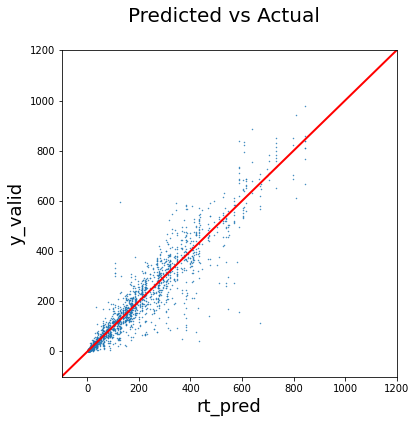

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(rt_pred, y_valid, s=0.2)
plt.xlim(-100,1200)
plt.ylim(-100,1200)
plt.plot([-100,1200],[-100,1200], color='r', linestyle='-',linewidth=2)
plt.suptitle('Predicted vs Actual', fontsize=20)
plt.xlabel('rt_pred', fontsize=18)
plt.ylabel('y_valid', fontsize=18)
plt.show()

In [ ]:
RMSLE(rt_pred, y_valid)

0.4049611030011715

**Fit a ramdom forest**



The random forest(s main tuning parameters are max_features (the number of variables it randomly selects to split on at each node) and min_samples_leaf (the number of samples in each terminal node)

In [ ]:
rf= RandomForestRegressor(n_estimators=500, max_features=4, min_samples_leaf=5,random_state=201)
rf_model=rf.fit(X_train,y_train)
rf_pred = rf_model.predict(X_valid)
                          

In [ ]:
pd.DataFrame(rf_model.feature_importances_, index=ind_variables_selected)

,0
workingday,0.036565
temp,0.130294
year,0.087563
month,0.057037
hour,0.641904
DOW,0.046636


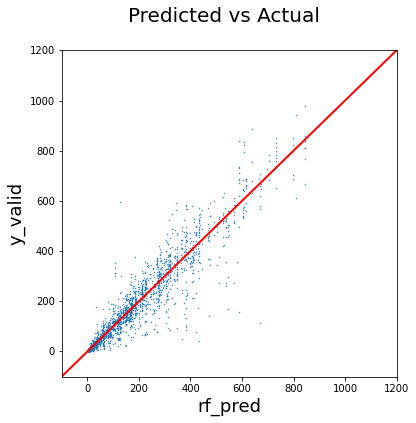

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(rt_pred,y_valid, s=0.2)
plt.xlim(-100,1200)
plt.ylim(-100,1200)
plt.plot([-100,1200],[-100,1200], color='r', linestyle='-',linewidth=2)
plt.suptitle('Predicted vs Actual', fontsize=20)
plt.xlabel('rf_pred', fontsize=18)
plt.ylabel('y_valid', fontsize=18)
plt.show()

In [ ]:
RMSLE(rf_pred, y_valid)

0.3811778902589845

**Fit a boosted trees model**

The boosted trees model (or xgboost model) requires a special data structure as its inputs. The next two lines of code will create such a structure for the smaller training and validation sets

In [ ]:
xgb_train= xgb.DMatrix(X_train, label = y_train)
xgb_valid= xgb.DMatrix(X_valid)


the main tuning parameters of a boosted trees model are the number of trees (num_round), the depth of each tree (max_depth) and the learning rate (eta)

In [ ]:
num_round_for_cv = 500
param = {'max_depth':6, 'eta':0.1, 'seed':201, 'objective':'reg:squarederror'}

we first run xgboost in cross validation mode to find out the best number of round to use

In [ ]:
xgb.cv(param,xgb_train, num_round_for_cv, nfold=5, show_stdv=False, verbose_eval=True, as_pandas=False)

[0]	train-rmse:238.903	test-rmse:239.006
[1]	train-rmse:219.27	test-rmse:219.536
[2]	train-rmse:201.578	test-rmse:201.939
[3]	train-rmse:186.03	test-rmse:186.598
[4]	train-rmse:172.109	test-rmse:172.886
[5]	train-rmse:159.902	test-rmse:160.782
[6]	train-rmse:148.947	test-rmse:149.862
[7]	train-rmse:139.441	test-rmse:140.392
[8]	train-rmse:130.216	test-rmse:131.256
[9]	train-rmse:121.495	test-rmse:122.732
[10]	train-rmse:113.817	test-rmse:115.396
[11]	train-rmse:107.203	test-rmse:108.93
[12]	train-rmse:101.245	test-rmse:103.251
[13]	train-rmse:96.0061	test-rmse:98.2345
[14]	train-rmse:91.5845	test-rmse:94.0663
[15]	train-rmse:87.5041	test-rmse:90.0732
[16]	train-rmse:83.6722	test-rmse:86.4319
[17]	train-rmse:80.4064	test-rmse:83.4566
[18]	train-rmse:77.574	test-rmse:80.8508
[19]	train-rmse:74.9404	test-rmse:78.3892
[20]	train-rmse:72.3884	test-rmse:76.0804
[21]	train-rmse:70.0759	test-rmse:73.8843
[22]	train-rmse:68.0842	test-rmse:72.0104
[23]	train-rmse:66.192	test-rmse:70.3138
[24]	tr

{'test-rmse-mean': [239.006439,
  219.53600160000002,
  201.93927620000002,
  186.59799199999998,
  172.886493,
  160.7817444,
  149.86242080000002,
  140.3920776,
  131.25567640000003,
  122.73231960000001,
  115.39622340000001,
  108.930269,
  103.251172,
  98.2345474,
  94.0662764,
  90.07318719999999,
  86.4318526,
  83.4565936,
  80.85078860000002,
  78.3892194,
  76.08036519999999,
  73.88426799999999,
  72.0104172,
  70.31384739999999,
  68.674541,
  67.0639588,
  65.4854866,
  64.0846376,
  62.70750820000001,
  61.63624120000001,
  60.82330939999999,
  60.0128732,
  59.3789086,
  58.91086580000001,
  58.51636980000001,
  58.11123260000001,
  57.816779200000006,
  57.4282282,
  57.15461580000001,
  56.9281738,
  56.6827994,
  56.4307204,
  56.125779,
  55.85425399999999,
  55.66708620000001,
  55.529174,
  55.239519400000006,
  55.13508360000001,
  54.97659699999999,
  54.8273568,
  54.6692758,
  54.58942879999999,
  54.394963,
  54.2963614,
  54.130269,
  54.031986999999994,
  

choose the number of rounds (num_round) with the lowest test_rmse and rerun the model below

In [ ]:
num_round=400
xgb_model = xgb.train(param, xgb_train, num_round)
xgb_pred = xgb_model.predict(xgb_valid)

Get the unnormalized feature importance scores

In [ ]:
xgb_model.get_fscore()

{'DOW': 3521,
 'hour': 6266,
 'month': 3454,
 'temp': 5639,
 'workingday': 1082,
 'year': 1546}

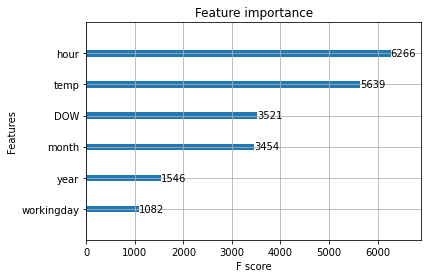

In [ ]:
xgb.plot_importance(xgb_model)

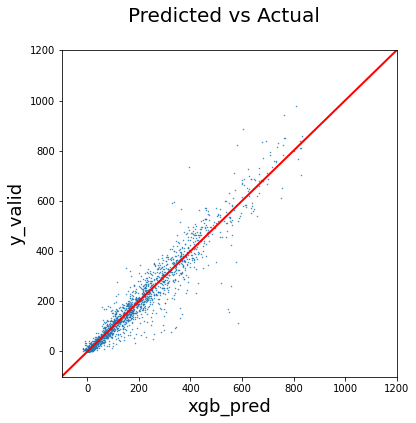

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(xgb_pred,y_valid, s=0.2)
plt.xlim(-100,1200)
plt.ylim(-100,1200)
plt.plot([-100,1200],[-100,1200], color='r', linestyle='-',linewidth=2)
plt.suptitle('Predicted vs Actual', fontsize=20)
plt.xlabel('xgb_pred', fontsize=18)
plt.ylabel('y_valid', fontsize=18)
plt.show()

In [ ]:
RMSLE(xgb_pred, y_valid)

0.5258462161554018

**Make predictions in the testing test**

First retrain your model on the original training test

In [ ]:
rt_model_retrain = rt.fit(X_orig_train, y_orig_train)
rt_pred_test = rt_model_retrain.predict(X_test)
rt_pred_test_clipped = pd.Series(rt_pred_test.clip(0))
print(rt_pred_test_clipped)

0        11.312500
1         4.785714
2         4.785714
3         5.347826
4        17.153846
           ...    
3261     33.789474
3262    156.411765
3263    224.777778
3264    585.214286
3265    534.888889
Length: 3266, dtype: float64


In [ ]:
rf_model_retrain = rf.fit(X_orig_train, y_orig_train)
rf_pred_test = rf_model_retrain.predict(X_test)
rf_pred_test_clipped = pd.Series(rf_pred_test.clip(0))
print(rf_pred_test_clipped)

0        10.547579
1         4.226718
2         4.306011
3         5.252976
4        28.917932
           ...    
3261     31.276377
3262    194.173327
3263    221.551587
3264    568.262430
3265    512.109909
Length: 3266, dtype: float64


In [ ]:
xgb_origin_train = xgb.DMatrix(X_orig_train, label = y_orig_train)
xgb_test = xgb.DMatrix(X_test)
xgb_model_retrain = xgb.train(param, xgb_origin_train, num_round)
xgb_pred_test= xgb_model_retrain.predict(xgb_test)
xgb_pred_test_clipped = pd.Series(xgb_pred_test.clip(0))
print(xgb_pred_test_clipped)

0        12.091330
1         2.135147
2         1.817031
3         4.483827
4         0.000000
           ...    
3261     32.607071
3262    181.960861
3263    233.281830
3264    548.098450
3265    501.533417
Length: 3266, dtype: float32
